# Plot mobility chart

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import seaborn as sns
import util
import pandas as pd
from PIL import Image

## Loading data

In [18]:
df_mobility = pd.read_csv('data/output/df_mobilidade_nacional.csv')
df_mobility.DATA = pd.to_datetime(df_mobility.DATA, infer_datetime_format=True)
df_mobility = df_mobility.sort_values('DATA')

## Plot charts

In [19]:
myFmt = mdates.DateFormatter('%m/%Y')
style = dict(color='black')
plt.rc('font', size=8)
sns.set_style("ticks")

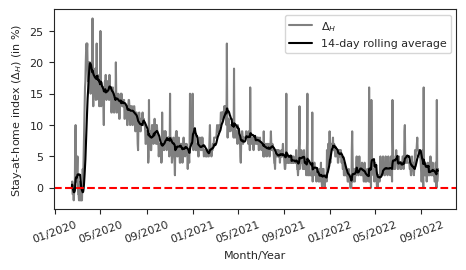

In [21]:
fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(13.2), util.centimeter_to_inch(6.6)))

plt.plot(df_mobility.DATA, df_mobility.PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS, color='gray', label='$\Delta_{H}$')
plt.plot(df_mobility.DATA, df_mobility.PERCENTUAL_VARIACAO_PERMANENCIA_RESIDENCIAS.rolling(14, min_periods=1).mean(), color='black', label='14-day rolling average')

plt.axhline(0, 0, 1, linestyle='--', color='red')

ax.legend()

plt.ylabel('Stay-at-home index ($\Delta_{H}$) (in %)')
ax.xaxis.set_major_formatter(myFmt)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel('Month/Year')
plt.xticks(rotation=20)
plt.savefig('images/national_population_mobility.pdf', bbox_inches="tight")
plt.savefig('images/national_population_mobility.tiff', format='tiff', dpi=300, transparent=False, bbox_inches='tight')
img = Image.open("images/national_population_mobility.tiff")
img.save("images/national_population_mobility_compressed.tiff", compression="tiff_lzw")
plt.show()